In [1268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error



In [1269]:
# load data

data_day_n1 = pd.read_csv('data/prices_round_2_day_-1.csv', delimiter=';')

data_day_0 = pd.read_csv('data/prices_round_2_day_0.csv', delimiter=';')

data_day_1 = pd.read_csv('data/prices_round_2_day_1.csv', delimiter=';')

online = pd.read_csv('data/online.csv', delimiter=';')


day_n1 = pd.read_csv('data/prices_round_2_day_-1.csv', delimiter=';')
day_0 = pd.read_csv('data/prices_round_2_day_0.csv', delimiter=';')
# add the timestamp of the last row of day n1 to day 0 
day_0['timestamp'] = day_0['timestamp'] + day_n1.iloc[-1]['timestamp']
day_1 = pd.read_csv('data/prices_round_2_day_1.csv', delimiter=';')
# add the timestamp of the last row of day 0 to day 1
day_1['timestamp'] = day_1['timestamp'] + day_0.iloc[-1]['timestamp']

data = pd.concat([day_n1, day_0, day_1])

In [1270]:
data_day_1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1


In [1271]:
online

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,AMETHYSTS,9998,3,9996.0,1.0,9995.0,21.0,10004,1,10005.0,21.0,NaN,NaN,10001.0,0.0
1,1,0,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.0
2,1,0,STARFRUIT,5048,1,5047.0,22.0,NaN,NaN,5054,22,NaN,NaN,NaN,NaN,5051.0,0.0
3,1,100,STARFRUIT,5047,26,NaN,NaN,NaN,NaN,5052,5,5054.0,26.0,NaN,NaN,5049.5,0.0
4,1,100,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2996,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.0
2997,1,99900,STARFRUIT,5043,28,NaN,NaN,NaN,NaN,5050,28,NaN,NaN,NaN,NaN,5046.5,0.0
2998,1,99900,ORCHIDS,1067,7,1066.0,4.0,1059.0,49.0,1074,7,1075.0,4.0,1081.0,49.0,1070.5,0.0


In [1272]:
# Calculate relative production of orchids

# If the sunlight exposure is less than 7 hours per day, the production drops 4% every 10 minutes
# Humidity also plays a part: if the humidity is higher than 80% or lower than 60%, production will fall 2% for every 5% change in humidity

# If humidity > 80% then humidity_effect = ((humidity - 80)/5)
# If humidity < 60% then humidity_effect = ((60 - humidity)/5)
data_day_n1['humidity_effect_on_production'] = np.where(data_day_n1['HUMIDITY'] > 80, round((data_day_n1['HUMIDITY'] - 80)/5), np.where(data_day_n1['HUMIDITY'] < 60, round((data_day_n1['HUMIDITY'] - 60)/5), 0))
data_day_0['humidity_effect_on_production'] = np.where(data_day_0['HUMIDITY'] > 80, round((data_day_0['HUMIDITY'] - 80)/5), np.where(data_day_0['HUMIDITY'] < 60, round((data_day_0['HUMIDITY'] - 60)/5), 0))
data_day_1['humidity_effect_on_production'] = np.where(data_day_1['HUMIDITY'] > 80, round((data_day_1['HUMIDITY'] - 80)/5), np.where(data_day_1['HUMIDITY'] < 60, round((data_day_1['HUMIDITY'] - 60)/5), 0))

In [1273]:
# # now calculate the weighted effect on production 

# # first we divide the humidity_effect_on_production by 139 ticks (10 minutes) to get the effect per tick, then we add the last 139 values to get the total effect
# data_day_n1['humidity_effect_on_production'] = data_day_n1['humidity_effect_on_production']/139
# data_day_0['humidity_effect_on_production'] = data_day_0['humidity_effect_on_production']/139
# data_day_1['humidity_effect_on_production'] = data_day_1['humidity_effect_on_production']/139

# data_day_n1['humidity_effect_on_production'] = data_day_n1['humidity_effect_on_production'].rolling(139).sum()
# data_day_0['humidity_effect_on_production'] = data_day_0['humidity_effect_on_production'].rolling(139).sum()
# data_day_1['humidity_effect_on_production'] = data_day_1['humidity_effect_on_production'].rolling(139).sum()


Text(0, 0.5, 'ORCHIDS')

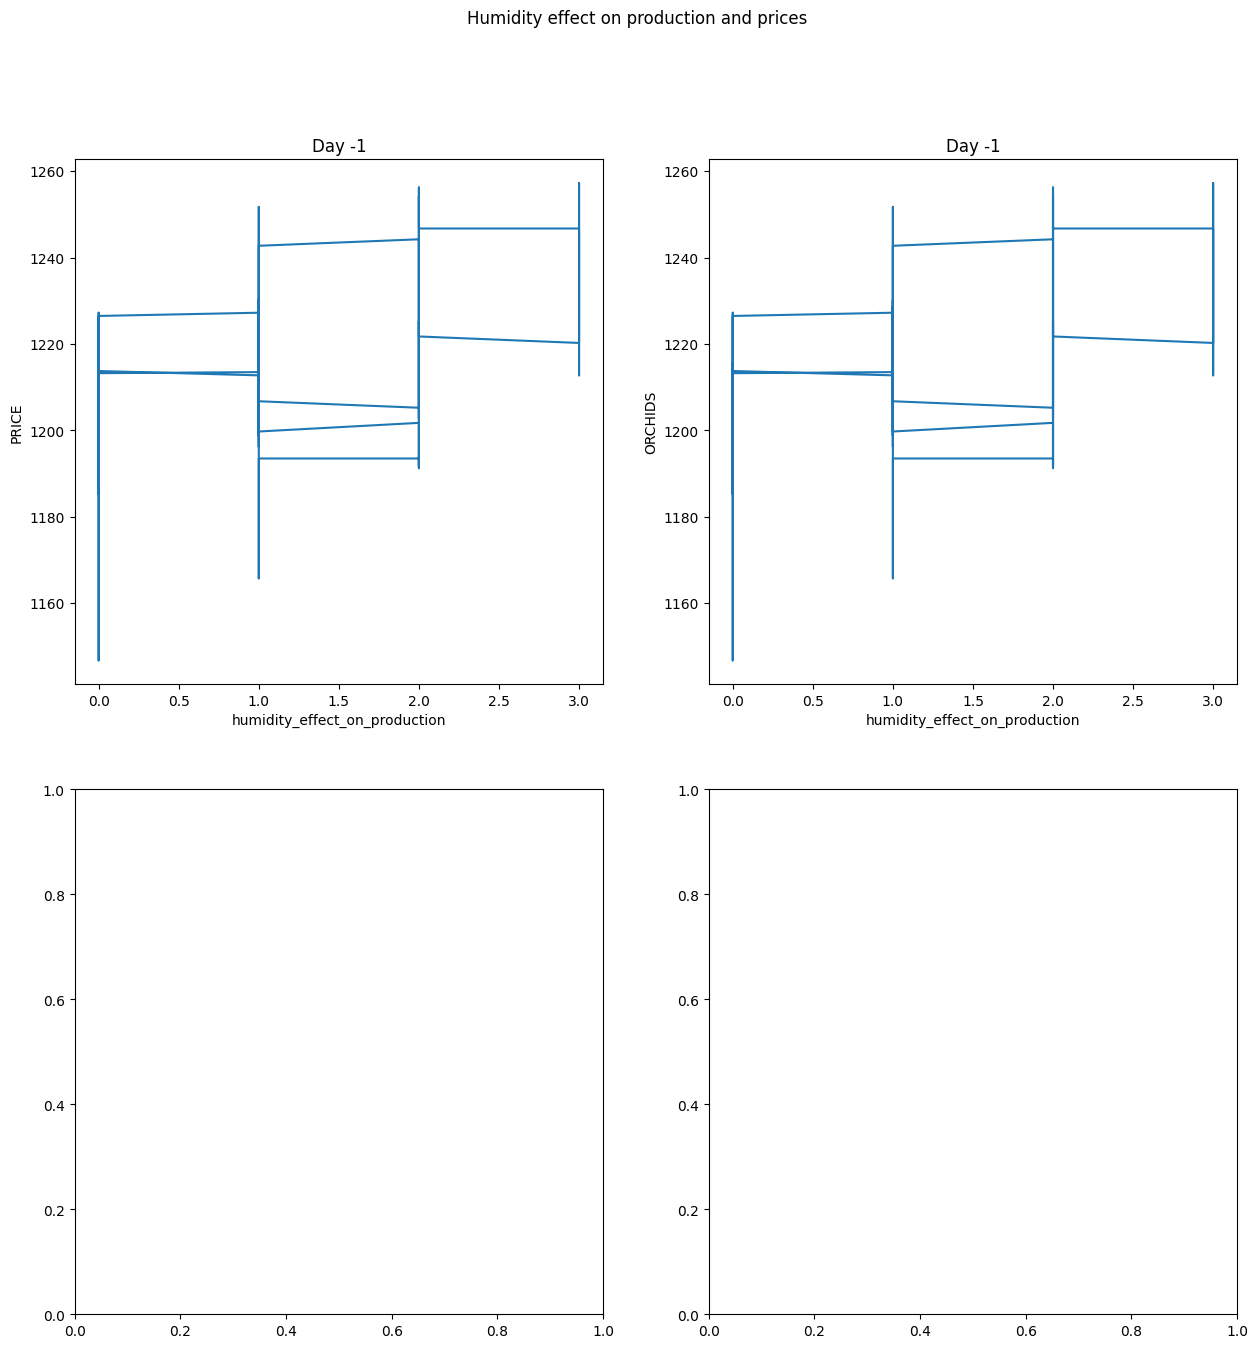

In [1274]:
# subplot humidity_effect_on_production and prices 

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Humidity effect on production and prices')

axs[0, 0].plot(data_day_n1['humidity_effect_on_production'], data_day_n1['ORCHIDS'])
axs[0, 0].set_title('Day -1')
axs[0, 0].set_xlabel('humidity_effect_on_production')
axs[0, 0].set_ylabel('PRICE')

axs[0, 1].plot(data_day_n1['humidity_effect_on_production'], data_day_n1['ORCHIDS'])
axs[0, 1].set_title('Day -1')
axs[0, 1].set_xlabel('humidity_effect_on_production')
axs[0, 1].set_ylabel('ORCHIDS')


In [1275]:
# since the sunlight column shows the instantaneous sunlight, we need to calculate the total sunlight exposure per day
# threshold for "enough" sunlight is 2500
# assuming the day is 12 hours long, the total sunlight exposure is 2500 * 12 = 30000
# if the sunlight exposure is less than 7 hours per day, the production drops 4% every 10 minutes of not enough sunlight
# There are 10000 tics in 12 hours, so 10 minutes is (10000) / (12 * 6) = 139


# average exposure per day is 2500 
# Each tic is 12*60*60 / 10000 = 4.32 seconds

# That means that if we need 7 hours of sunlight, we need 7 * 60 * 60 / 4.32 = 5833 tics with sunlight exposure over 2500
data_day_n1['enough_sunlight'] = np.where(data_day_n1['SUNLIGHT'] >= 2500, 1, 0)
data_day_0['enough_sunlight'] = np.where(data_day_0['SUNLIGHT'] >= 2500, 1, 0)
data_day_1['enough_sunlight'] = np.where(data_day_1['SUNLIGHT'] >= 2500, 1, 0)


# count the number of tics with enough sunlight
data_day_n1['enough_sunlight_count'] = data_day_n1['enough_sunlight'].sum()
data_day_0['enough_sunlight_count'] = data_day_0['enough_sunlight'].sum()
data_day_1['enough_sunlight_count'] = data_day_1['enough_sunlight'].sum()

data_day_n1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,humidity_effect_on_production,enough_sunlight,enough_sunlight_count
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1,0.0,1,9795
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,0.0,0,9795
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,0.0,0,9795
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,0.0,0,9795
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,0.0,0,9795
...,...,...,...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,1.0,1,9795
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,1.0,1,9795
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,1.0,1,9795
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1,1.0,1,9795


In [1276]:

# For every 10 minutes of not enough sunlight, production drops 4%

data_day_n1["rolling_sunlight_count"] = data_day_n1["enough_sunlight"].rolling(window=139).sum()
data_day_0["rolling_sunlight_count"] = data_day_0["enough_sunlight"].rolling(window=139).sum()
data_day_1["rolling_sunlight_count"] = data_day_1["enough_sunlight"].rolling(window=139).sum()


data_day_n1["mean_sunlight_effect_of_last_10mins"] = ( data_day_n1["rolling_sunlight_count"].rolling(window=129).mean())
data_day_0["mean_sunlight_effect_of_last_10mins"] = (data_day_0["rolling_sunlight_count"].rolling(window=129).mean())
data_day_1["mean_sunlight_effect_of_last_10mins"] = (data_day_1["rolling_sunlight_count"].rolling(window=129).mean())


In [1277]:
# Now we want to calculate the probability that the amount of sunlight received in a day is enough to not affect production 
# if the sunlight exposure is above 2500 for 5833, then the production is not affected and the probability that the production will go down is 0%

# if the sunlight exposure is above 2500 for only 5833/2 ticks, then the chances that the production is affected is only 50%

# from here, we want to use the sigmoid function to calculate the probability that the production will be affected


data_day_n1['cumulative_ticks_with_enough_sunlight'] = data_day_n1['enough_sunlight'].cumsum()
data_day_0['cumulative_ticks_with_enough_sunlight'] = data_day_0['enough_sunlight'].cumsum()
data_day_1['cumulative_ticks_with_enough_sunlight'] = data_day_1['enough_sunlight'].cumsum()




# calculate the number of ticks left until the production will not be affected
data_day_n1["ticks_till_production_not_affected"] = np.where(data_day_n1['cumulative_ticks_with_enough_sunlight'] < 5833, (5833 - data_day_n1['cumulative_ticks_with_enough_sunlight']), 0)
data_day_0["ticks_till_production_not_affected"] = np.where(data_day_0['cumulative_ticks_with_enough_sunlight'] < 5833, (5833 - data_day_0['cumulative_ticks_with_enough_sunlight']), 0)
data_day_1["ticks_till_production_not_affected"] = np.where(data_day_1['cumulative_ticks_with_enough_sunlight'] < 5833, (5833 - data_day_1['cumulative_ticks_with_enough_sunlight']), 0)

# calculate the remaning ticks in the day
data_day_n1["remaining_ticks"] = 10000 - data_day_n1.index
data_day_0["remaining_ticks"] = 10000 - data_day_0.index
data_day_1["remaining_ticks"] = 10000 - data_day_1.index


data_day_1["spare_ticks"] = data_day_1["remaining_ticks"] - data_day_1["ticks_till_production_not_affected"]
data_day_0["spare_ticks"] = data_day_0["remaining_ticks"] - data_day_0["ticks_till_production_not_affected"]
data_day_n1["spare_ticks"] = data_day_n1["remaining_ticks"] - data_day_n1["ticks_till_production_not_affected"]


# calculate the probability that the production will be affected
data_day_n1['probability_of_production_drop'] = np.where(data_day_n1["ticks_till_production_not_affected"] > data_day_n1["remaining_ticks"], 1, np.where(data_day_n1['cumulative_ticks_with_enough_sunlight'] < 5833, np.where(data_day_n1['cumulative_ticks_with_enough_sunlight'] <= 5833, 1-data_day_n1['cumulative_ticks_with_enough_sunlight'] / 5833, 0 ), 0)) 
data_day_0['probability_of_production_drop'] = np.where(data_day_0["ticks_till_production_not_affected"] > data_day_0["remaining_ticks"], 1, np.where(data_day_0['cumulative_ticks_with_enough_sunlight'] < 5833, np.where(data_day_0['cumulative_ticks_with_enough_sunlight'] <= 5833, 1-data_day_0['cumulative_ticks_with_enough_sunlight'] / 5833, 0 ), 0)) 
data_day_1['probability_of_production_drop'] = np.where(data_day_1["ticks_till_production_not_affected"] > data_day_1["remaining_ticks"], 1, np.where(data_day_1['cumulative_ticks_with_enough_sunlight'] < 5833, np.where(data_day_1['cumulative_ticks_with_enough_sunlight'] <= 5833, 1-data_day_1['cumulative_ticks_with_enough_sunlight'] / 5833, 0 ), 0)) 

# calculate the average value of sunlight in the last 5833 ticks
data_day_n1['average_sunlight'] = data_day_n1['SUNLIGHT'].rolling(window=200).mean()
data_day_0['average_sunlight'] = data_day_0['SUNLIGHT'].rolling(window=200).mean()
data_day_1['average_sunlight'] = data_day_1['SUNLIGHT'].rolling(window=200).mean()


# if the probability of production drop >1 set to 1
data_day_n1['probability_of_production_drop'] = np.where(data_day_n1['probability_of_production_drop'] > 1, 1, data_day_n1['probability_of_production_drop'])
data_day_0['probability_of_production_drop'] = np.where(data_day_0['probability_of_production_drop'] > 1, 1, data_day_0['probability_of_production_drop'])
data_day_1['probability_of_production_drop'] = np.where(data_day_1['probability_of_production_drop'] > 1, 1, data_day_1['probability_of_production_drop'])

data_day_n1['ratio'] = data_day_n1['spare_ticks'] / data_day_n1['timestamp']
data_day_0['ratio'] = data_day_0['spare_ticks'] / data_day_0['timestamp']
data_day_1['ratio'] = data_day_1['spare_ticks'] / data_day_1['timestamp']

data_day_0

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,humidity_effect_on_production,enough_sunlight,enough_sunlight_count,rolling_sunlight_count,mean_sunlight_effect_of_last_10mins,cumulative_ticks_with_enough_sunlight,ticks_till_production_not_affected,remaining_ticks,spare_ticks,probability_of_production_drop,average_sunlight,ratio
0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.000000,0,3.0,1,2344,NaN,NaN,1,5832,10000,4168,0.999829,NaN,inf
1,100,1111.75,1.5,10.5,-2.0,4500.0356,94.995990,0,3.0,1,2344,NaN,NaN,2,5831,9999,4168,0.999657,NaN,41.680000
2,200,1109.75,1.5,10.5,-2.0,4500.0700,94.991980,0,3.0,1,2344,NaN,NaN,3,5830,9998,4168,0.999486,NaN,20.840000
3,300,1109.25,1.5,10.5,-2.0,4500.1016,94.987970,0,3.0,1,2344,NaN,NaN,4,5829,9997,4168,0.999314,NaN,13.893333
4,400,1110.75,1.5,10.5,-2.0,4500.1313,94.983950,0,3.0,1,2344,NaN,NaN,5,5828,9996,4168,0.999143,NaN,10.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999600,988.25,1.3,10.5,-2.6,1703.5710,64.989100,0,0.0,0,2344,0.0,0.0,2344,3489,4,-3485,1.000000,1770.054411,-0.003486
9997,999700,988.00,1.3,10.5,-2.6,1702.6835,64.991806,0,0.0,0,2344,0.0,0.0,2344,3489,3,-3486,1.000000,1769.485750,-0.003487
9998,999800,988.75,1.3,10.5,-2.6,1701.7925,64.994530,0,0.0,0,2344,0.0,0.0,2344,3489,2,-3487,1.000000,1768.914020,-0.003488
9999,999900,986.75,1.3,10.5,-2.6,1700.8980,64.997260,0,0.0,0,2344,0.0,0.0,2344,3489,1,-3488,1.000000,1768.339218,-0.003488


Text(0.5, 1.0, 'Day 1')

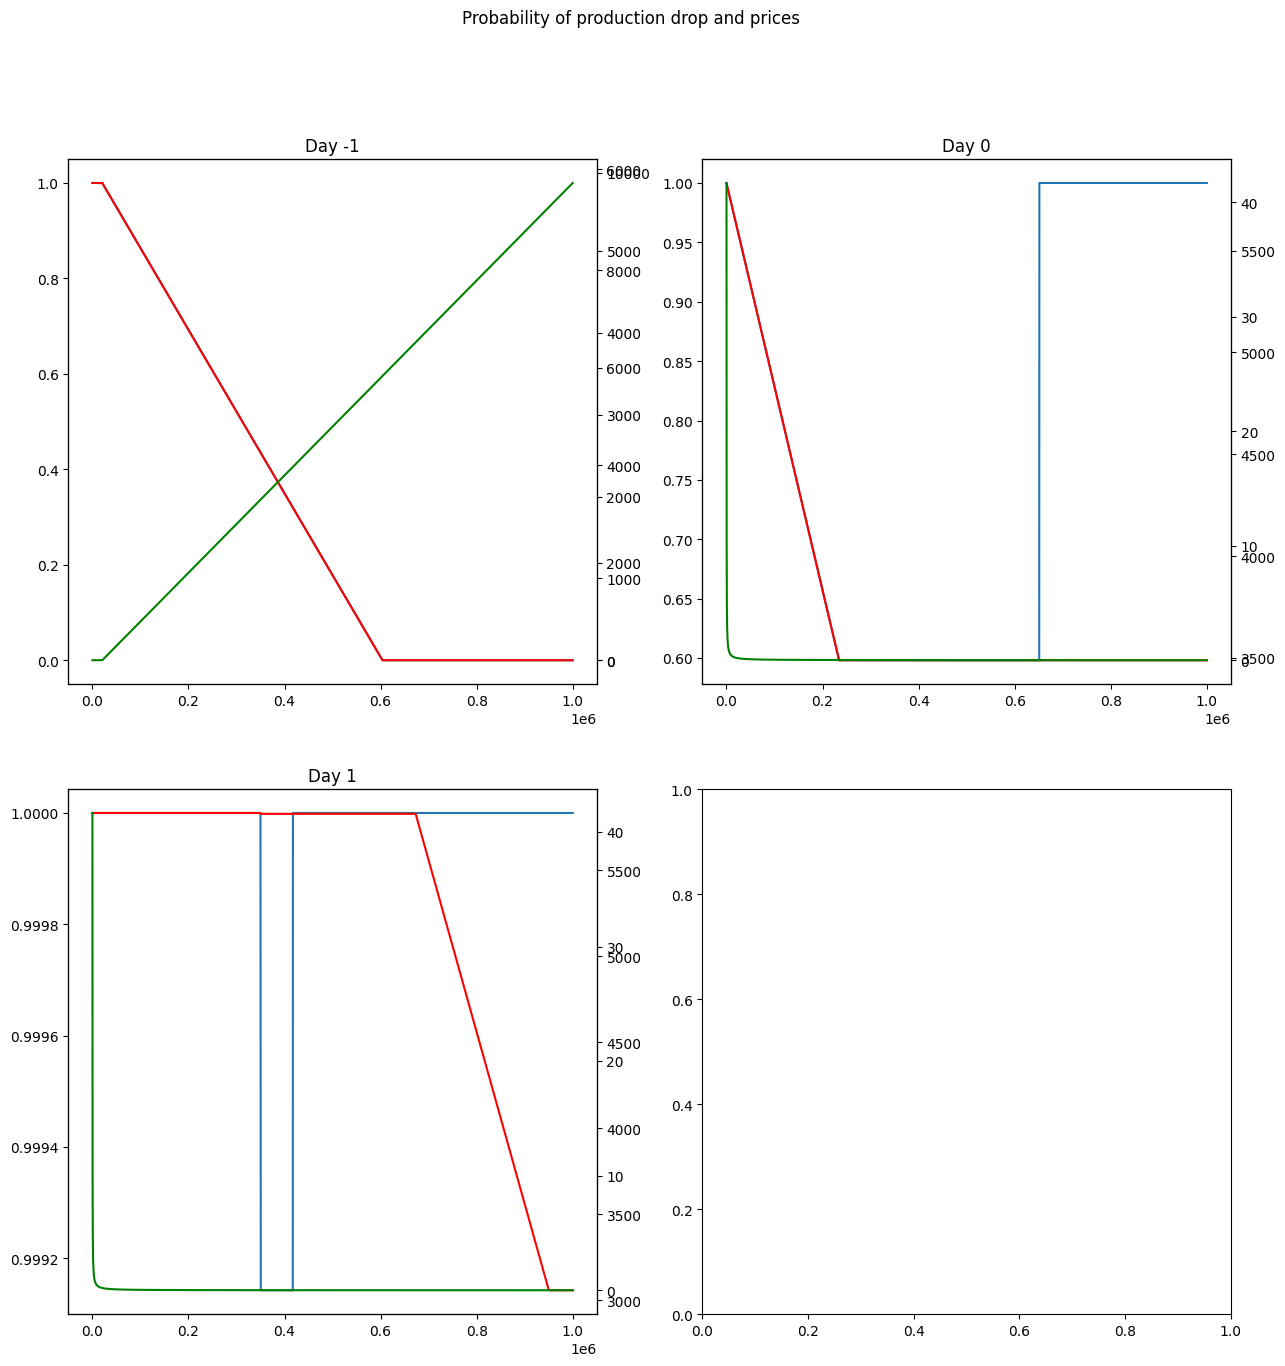

In [1278]:
# plot probability of production drop vs timestamp
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Probability of production drop and prices')

axs[0, 0].plot(data_day_n1['timestamp'], data_day_n1['probability_of_production_drop'])
axs00 = axs[0, 0].twinx()
axs00.plot(data_day_n1['timestamp'], data_day_n1['ticks_till_production_not_affected'], color='red')
axs001 = axs[0, 0].twinx()
axs001.plot(data_day_n1['timestamp'], data_day_n1['cumulative_ticks_with_enough_sunlight'], color='green')
axs[0, 0].set_title('Day -1')

axs[0, 1].plot(data_day_0['timestamp'], data_day_0['probability_of_production_drop'])
axs01 = axs[0, 1].twinx()
axs01.plot(data_day_0['timestamp'], data_day_0['ticks_till_production_not_affected'], color='red')
axs011 = axs[0, 1].twinx()
axs011.plot(data_day_0['timestamp'], data_day_0['ratio'], color='green')
axs[0, 1].set_title('Day 0')

axs[1, 0].plot(data_day_1['timestamp'], data_day_1['probability_of_production_drop'])
axs10 = axs[1,0].twinx()
axs10.plot(data_day_1['timestamp'], data_day_1['ticks_till_production_not_affected'], color='red')
axs101 = axs[1, 0].twinx()
axs101.plot(data_day_1['timestamp'], data_day_1['ratio'], color='green')
axs[1, 0].set_title('Day 1')


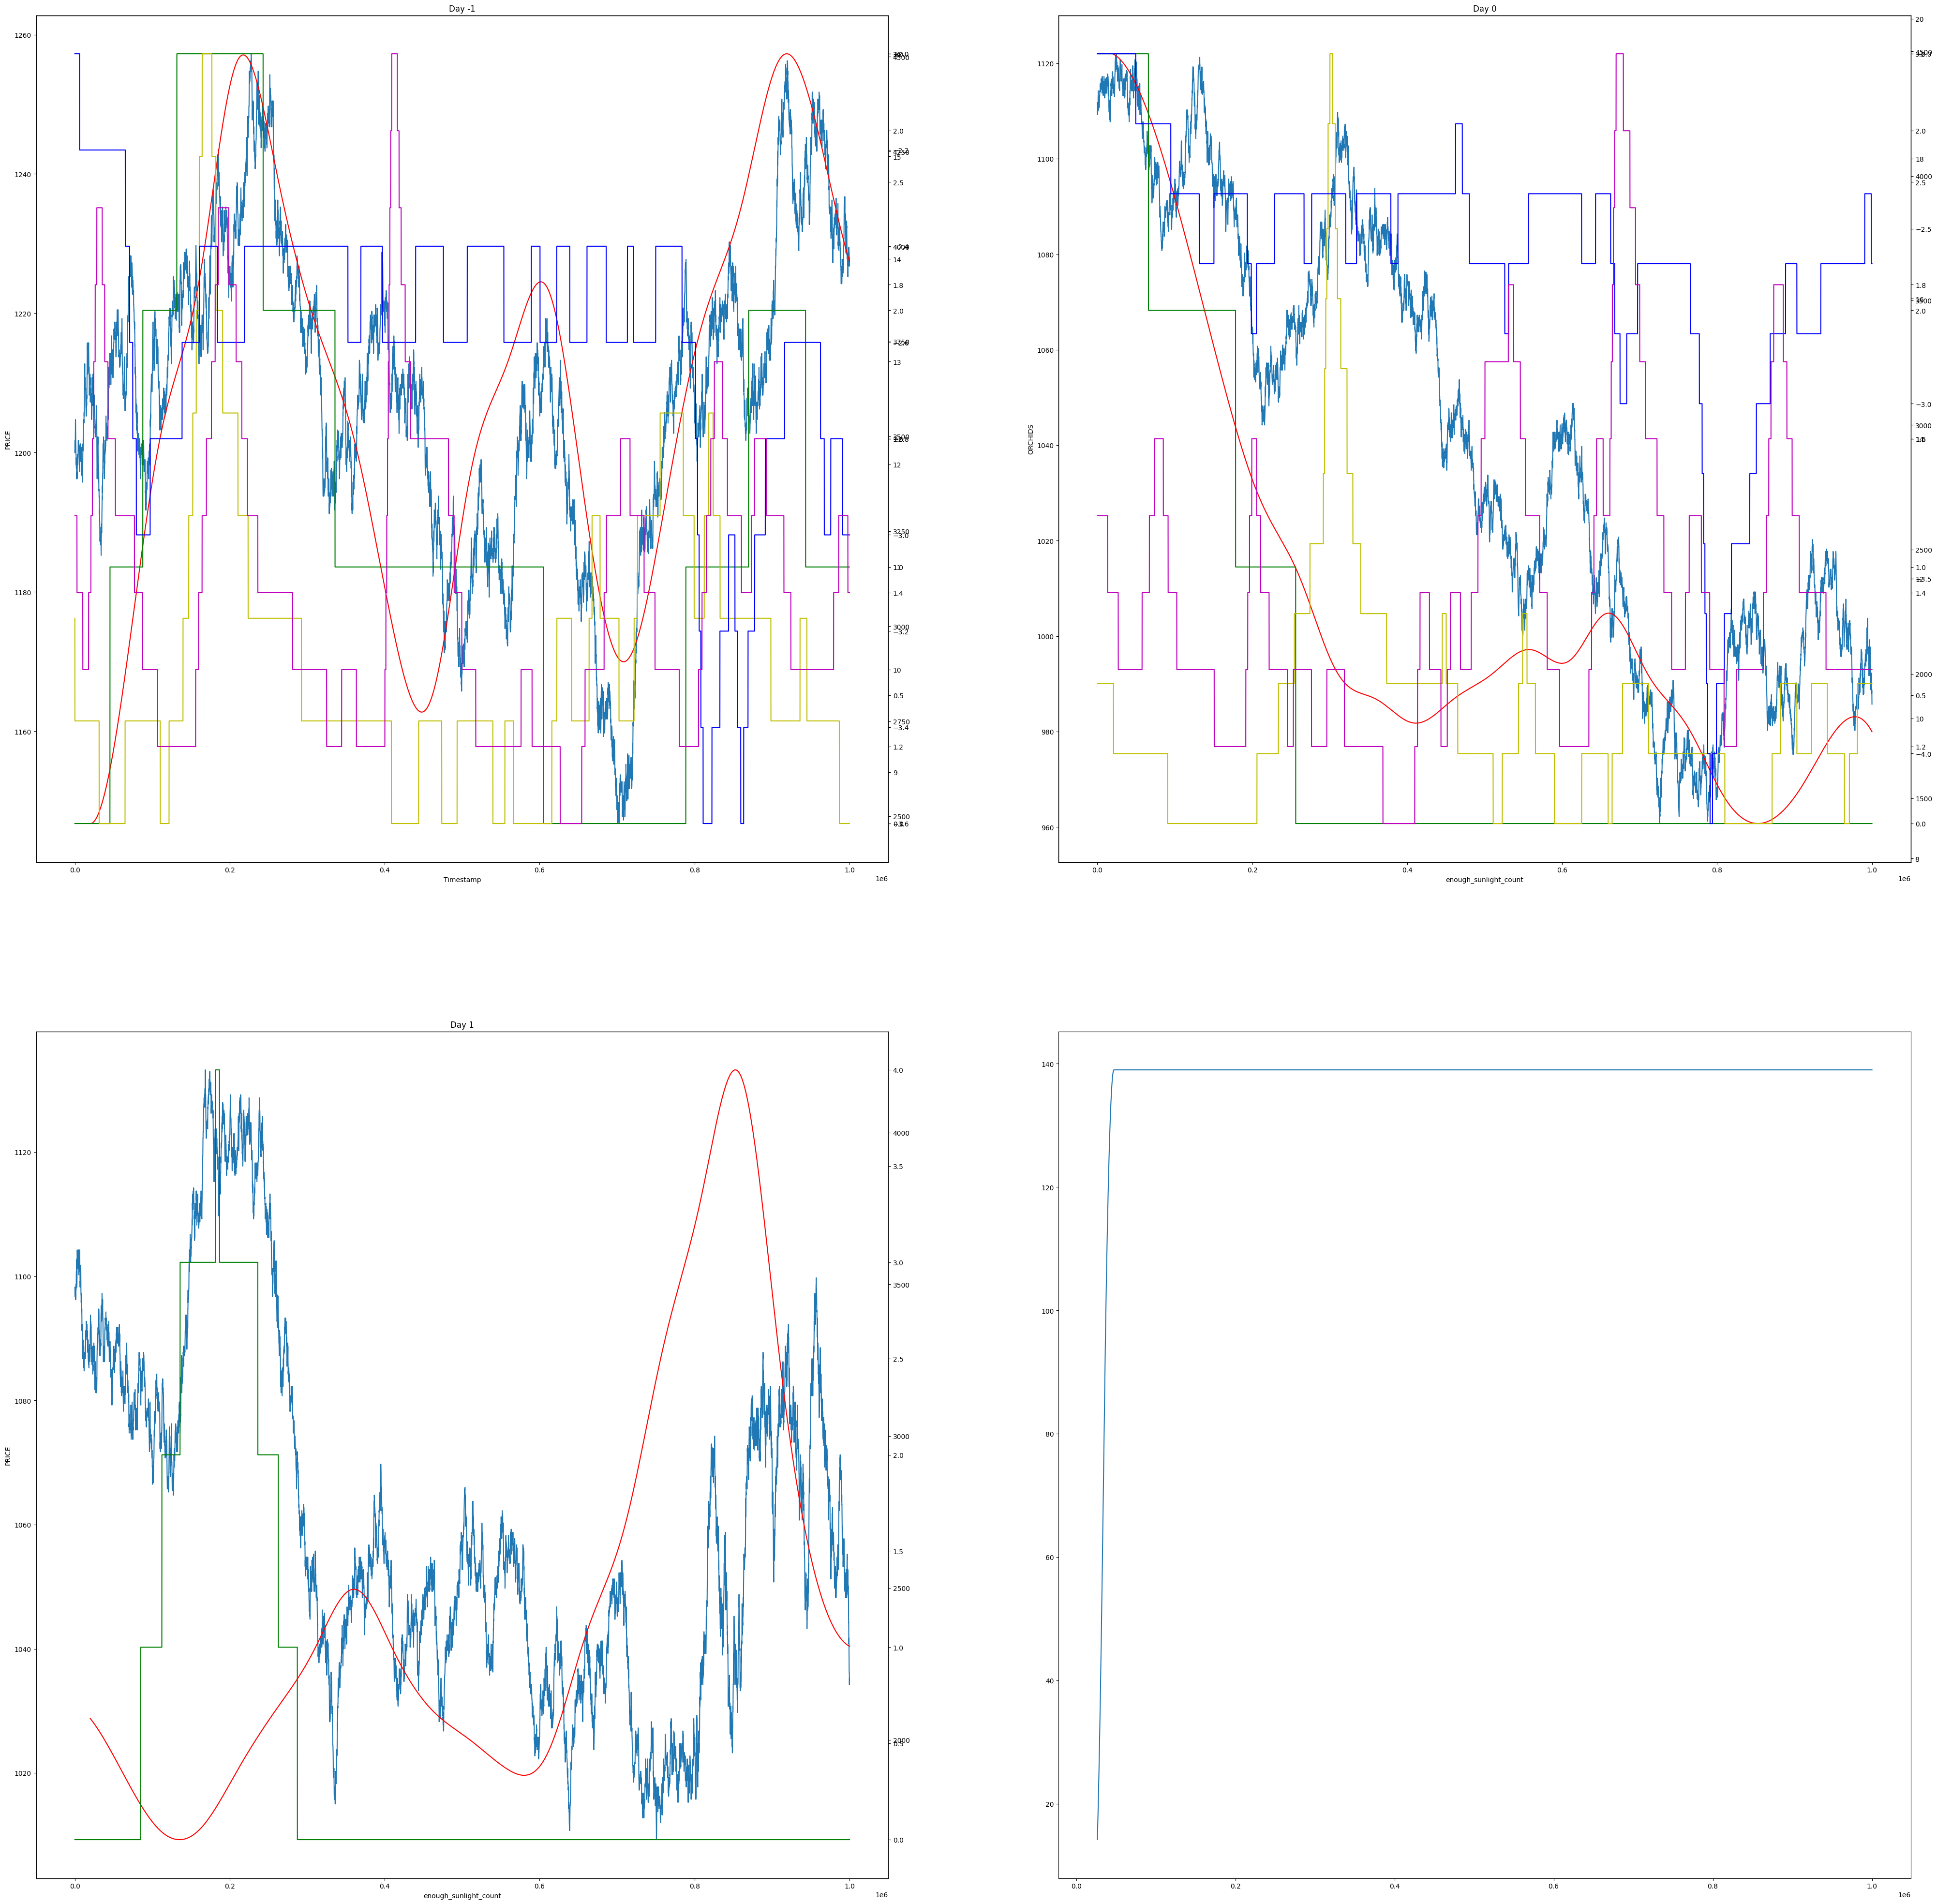

In [1279]:
# calculate the effect of sunlight on production

fig, axs = plt.subplots(2, 2, figsize=(50, 50))

# plot the effect of enough sunlight on production and prices
axs[0, 0].plot(data_day_n1["timestamp"], data_day_n1['ORCHIDS'])
ax02 = axs[0,0].twinx()
ax02.plot(data_day_n1["timestamp"], data_day_n1['average_sunlight'], color='r')
ax03 = axs[0,0].twinx()
ax03.plot(data_day_n1["timestamp"], data_day_n1['humidity_effect_on_production'], color='g')
# plot the import tariffs 
ax04 = axs[0,0].twinx()
ax04.plot(data_day_n1["timestamp"], data_day_n1['EXPORT_TARIFF'], color='y')
ax05 = axs[0,0].twinx()
ax05.plot(data_day_n1["timestamp"], data_day_n1['IMPORT_TARIFF'], color='b')
ax06 = axs[0,0].twinx()
ax06.plot(data_day_n1["timestamp"], data_day_n1['TRANSPORT_FEES'], color='m')
axs[0, 0].set_title('Day -1')
axs[0, 0].set_xlabel('Timestamp')
axs[0, 0].set_ylabel('PRICE')


axs[0, 1].plot(data_day_0['timestamp'], data_day_0['ORCHIDS'])
ax12 = axs[0,1].twinx()
ax12.plot(data_day_0['timestamp'], data_day_0['average_sunlight'], color='r')
ax13 = axs[0,1].twinx()
ax13.plot(data_day_0['timestamp'], data_day_0['humidity_effect_on_production'], color='g')
axs14 = axs[0,1].twinx()
axs14.plot(data_day_0['timestamp'], data_day_0['EXPORT_TARIFF'], color='y')
axs15 = axs[0,1].twinx()
axs15.plot(data_day_0['timestamp'], data_day_0['IMPORT_TARIFF'], color='b')
axs16 = axs[0,1].twinx()
axs16.plot(data_day_0['timestamp'], data_day_0['TRANSPORT_FEES'], color='m')

axs[0, 1].set_title('Day 0')
axs[0, 1].set_xlabel('enough_sunlight_count')
axs[0, 1].set_ylabel('ORCHIDS')


axs[1, 0].plot(data_day_1['timestamp'], data_day_1['ORCHIDS'])
ax22 = axs[1,0].twinx()
ax22.plot(data_day_1['timestamp'], data_day_1['average_sunlight'], color='r')
ax23 = axs[1,0].twinx()
ax23.plot(data_day_1['timestamp'], data_day_1['humidity_effect_on_production'], color='g')
axs[1, 0].set_title('Day 1')
axs[1, 0].set_xlabel('enough_sunlight_count')
axs[1, 0].set_ylabel('PRICE')


axs[1,1].plot(data_day_n1['timestamp'], data_day_n1['mean_sunlight_effect_of_last_10mins'])


Text(0, 0.5, 'PRICE')

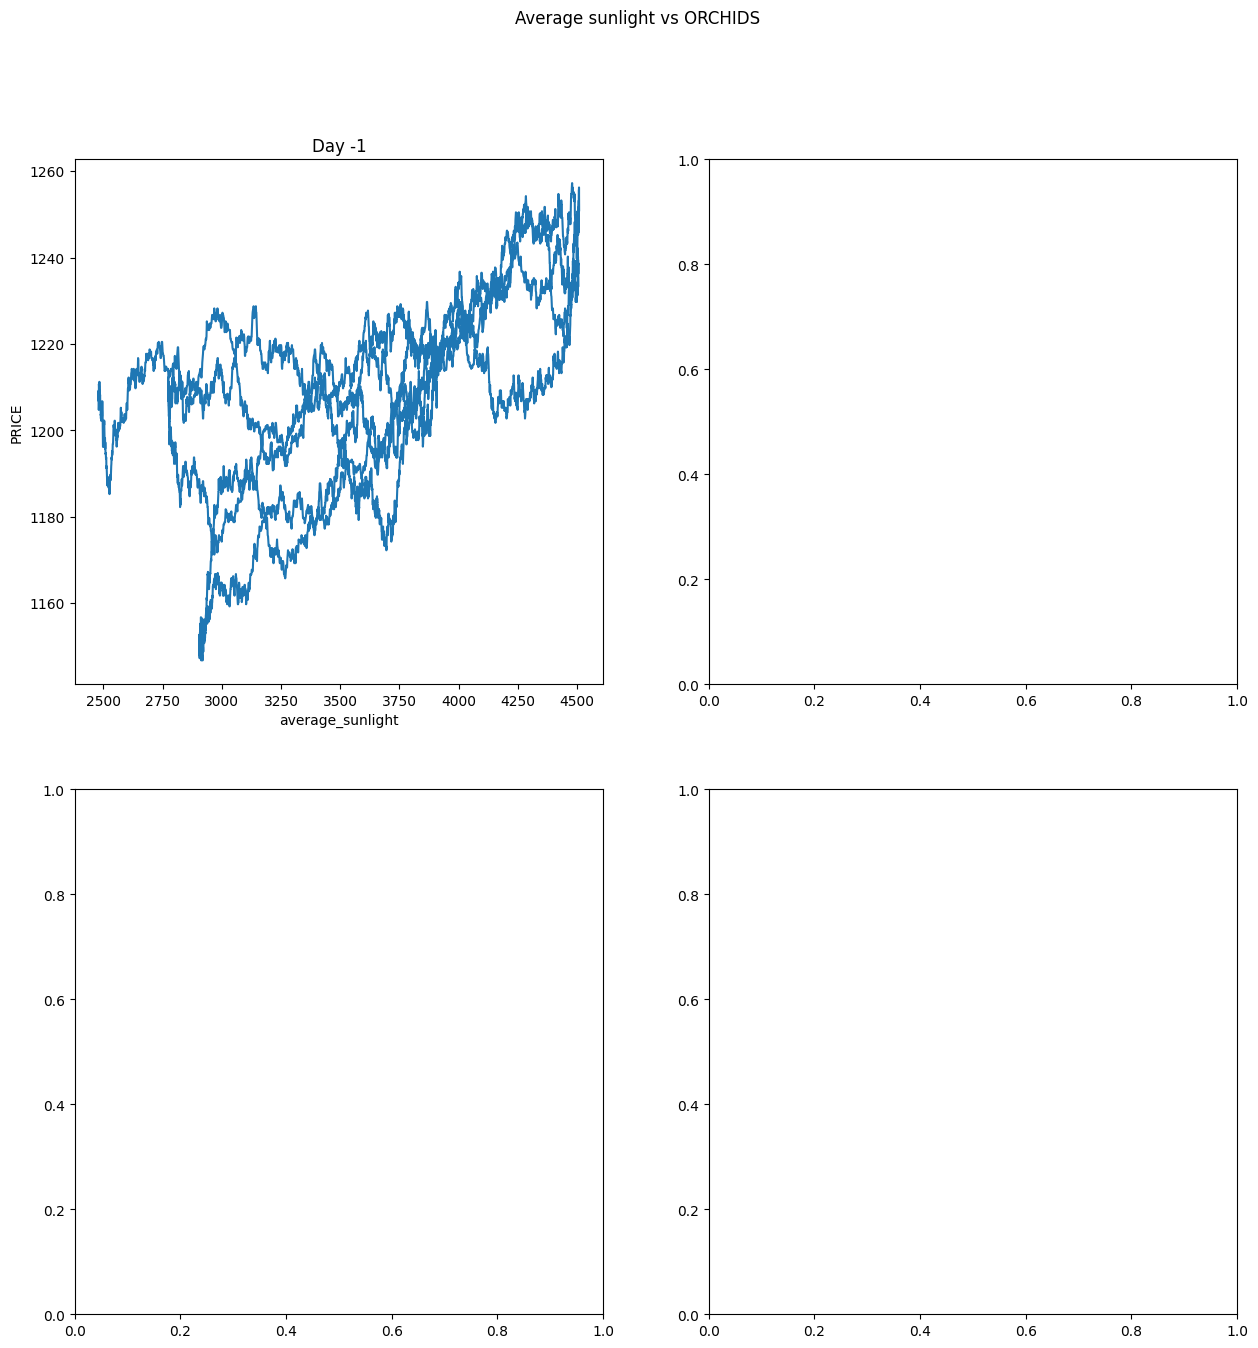

In [1280]:
# average sunlight vs ORCHIDS

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Average sunlight vs ORCHIDS')

axs[0, 0].plot(data_day_n1['average_sunlight'], data_day_n1['ORCHIDS'])
axs[0, 0].set_title('Day -1')
axs[0, 0].set_xlabel('average_sunlight')
axs[0, 0].set_ylabel('PRICE')


In [1281]:
# Add the last timestamp to of day n1 to day 0 
data_day_0['timestamp'] = data_day_0['timestamp'] +data_day_n1['timestamp'].iloc[-1]
data_day_1['timestamp'] = data_day_1['timestamp'] + data_day_0['timestamp'].iloc[-1]

data = pd.concat([data_day_n1, data_day_0, data_day_1])


# only get online orders for ORCHIDS
online = online[online['product'] == 'ORCHIDS']

data = pd.merge(data, online, on='timestamp', how='left')

data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,humidity_effect_on_production,enough_sunlight,...,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,0.0,1,...,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.0
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,0.0,0,...,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.0
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,0.0,0,...,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,0.0
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,0.0,0,...,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,0.0
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,0.0,0,...,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,2999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29999,2999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000,2999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30001,2999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1282]:

# calculate the true cost of an orchid: ask price + import tariff + transport cost 

data_day_n1["true_price"] = data_day_n1["ORCHIDS"] + data_day_n1["IMPORT_TARIFF"] + data_day_n1["TRANSPORT_FEES"]
data_day_0["true_price"] = data_day_0["ORCHIDS"] + data_day_0["IMPORT_TARIFF"] + data_day_0["TRANSPORT_FEES"]
data_day_1["true_price"] = data_day_1["ORCHIDS"] + data_day_1["IMPORT_TARIFF"] + data_day_1["TRANSPORT_FEES"]

data_day_n1["price_difference"] = data_day_n1["true_price"] - data_day_n1["ORCHIDS"]

# potential profit is true price - export tariff - transport fees
data_day_n1["potential_profit"] = data_day_n1["true_price"] - (data_day_n1["ORCHIDS"] - - data_day_n1["EXPORT_TARIFF"] - data_day_n1["TRANSPORT_FEES"])



In [1283]:
# adjust the probability of the production drop based on how long along the day is. 

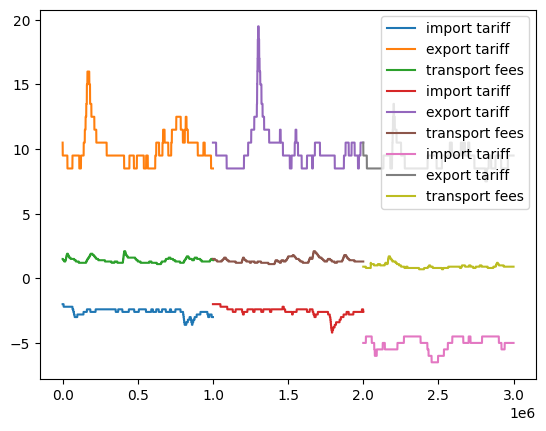

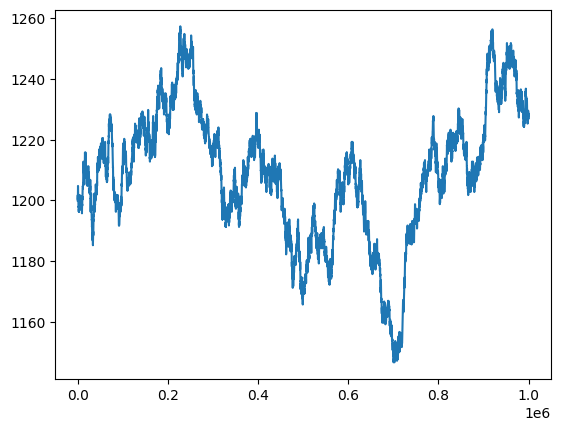

In [1284]:
# plot import and export tariffs

plt.plot(data_day_n1['timestamp'], data_day_n1['IMPORT_TARIFF'], label='import tariff')
plt.plot(data_day_n1['timestamp'], data_day_n1['EXPORT_TARIFF'], label='export tariff')
plt.plot(data_day_n1['timestamp'], data_day_n1['TRANSPORT_FEES'], label='transport fees')

plt.plot(data_day_0['timestamp'], data_day_0['IMPORT_TARIFF'], label='import tariff')
plt.plot(data_day_0['timestamp'], data_day_0['EXPORT_TARIFF'], label='export tariff')
plt.plot(data_day_0['timestamp'], data_day_0['TRANSPORT_FEES'], label='transport fees')

plt.plot(data_day_1['timestamp'], data_day_1['IMPORT_TARIFF'], label='import tariff')
plt.plot(data_day_1['timestamp'], data_day_1['EXPORT_TARIFF'], label='export tariff')
plt.plot(data_day_1['timestamp'], data_day_1['TRANSPORT_FEES'], label='transport fees')

plt.legend()
plt.show()

# plot the price of the orchids against the timestamp
plt.plot(data_day_n1['timestamp'], data_day_n1['ORCHIDS'])
plt.show()

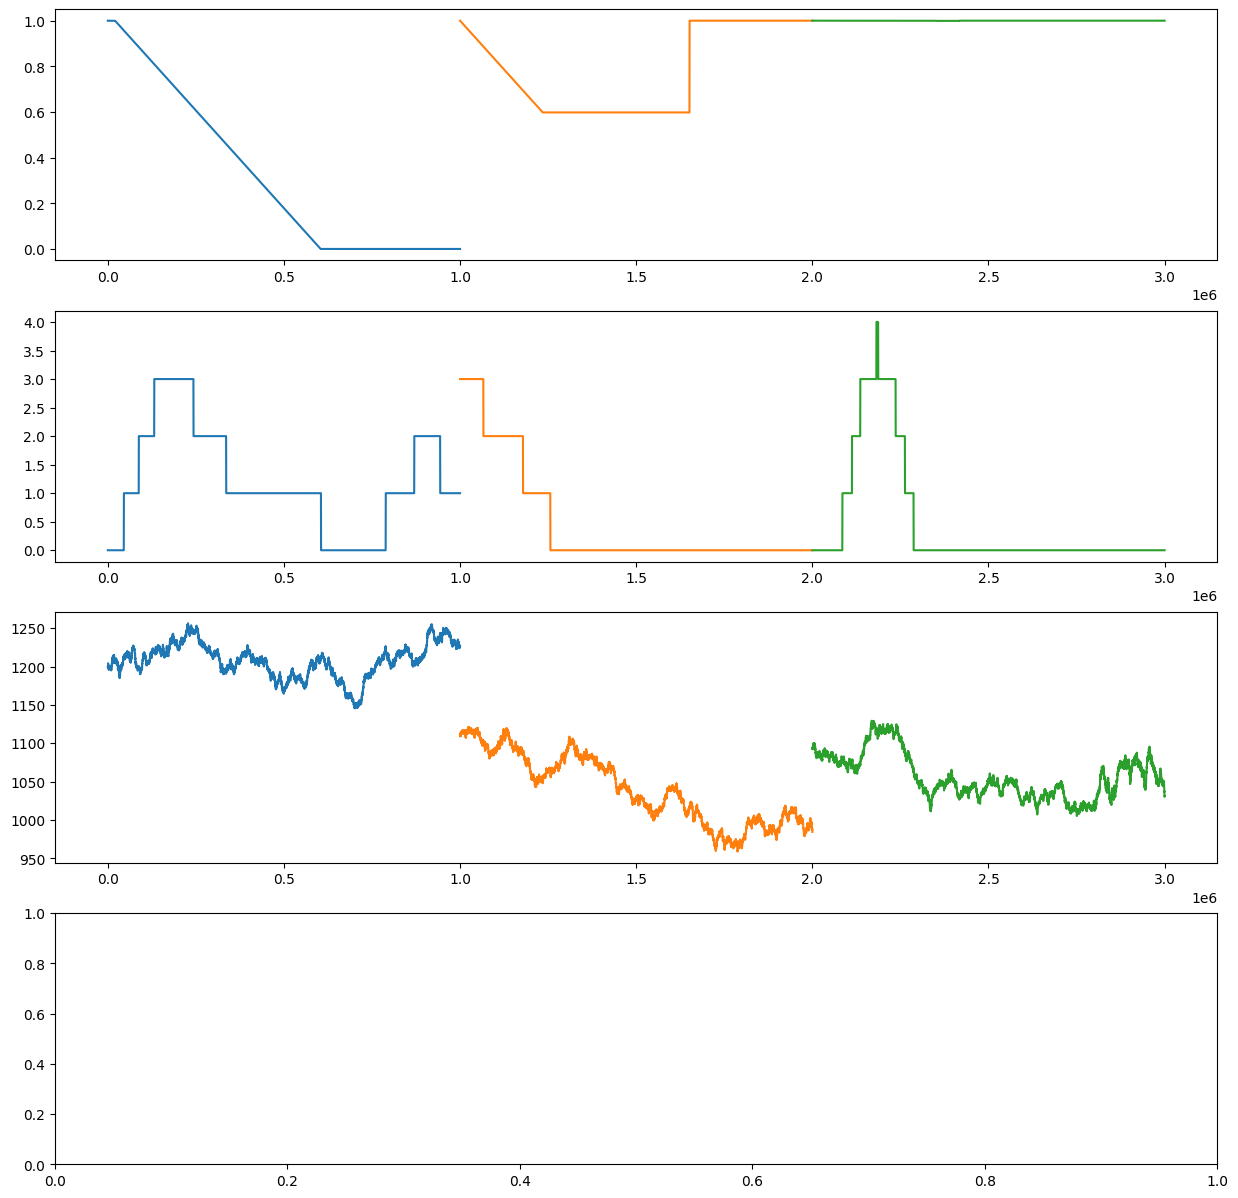

In [1285]:
# create a subplot with 4 tables 
fig, axs = plt.subplots(4,1, figsize=(15, 15))

# plot the probability of production drop against the timestamp for the three days
axs[0].plot(data_day_n1['timestamp'], data_day_n1['probability_of_production_drop'], label='day -1')
axs[0].plot(data_day_0['timestamp'], data_day_0['probability_of_production_drop'], label='day 0')
axs[0].plot(data_day_1['timestamp'], data_day_1['probability_of_production_drop'], label='day 1')

# also plot the humidity effect on production
axs[1].plot(data_day_n1['timestamp'], data_day_n1['humidity_effect_on_production'], label='day -1')
axs[1].plot(data_day_0['timestamp'], data_day_0['humidity_effect_on_production'], label='day 0')
axs[1].plot(data_day_1['timestamp'], data_day_1['humidity_effect_on_production'], label='day 1')

# now plot the true price of the orchids
axs[2].plot(data_day_n1['timestamp'], data_day_n1['true_price'], label='day -1')
axs[2].plot(data_day_0['timestamp'], data_day_0['true_price'], label='day 0')
axs[2].plot(data_day_1['timestamp'], data_day_1['true_price'], label='day 1')


45400

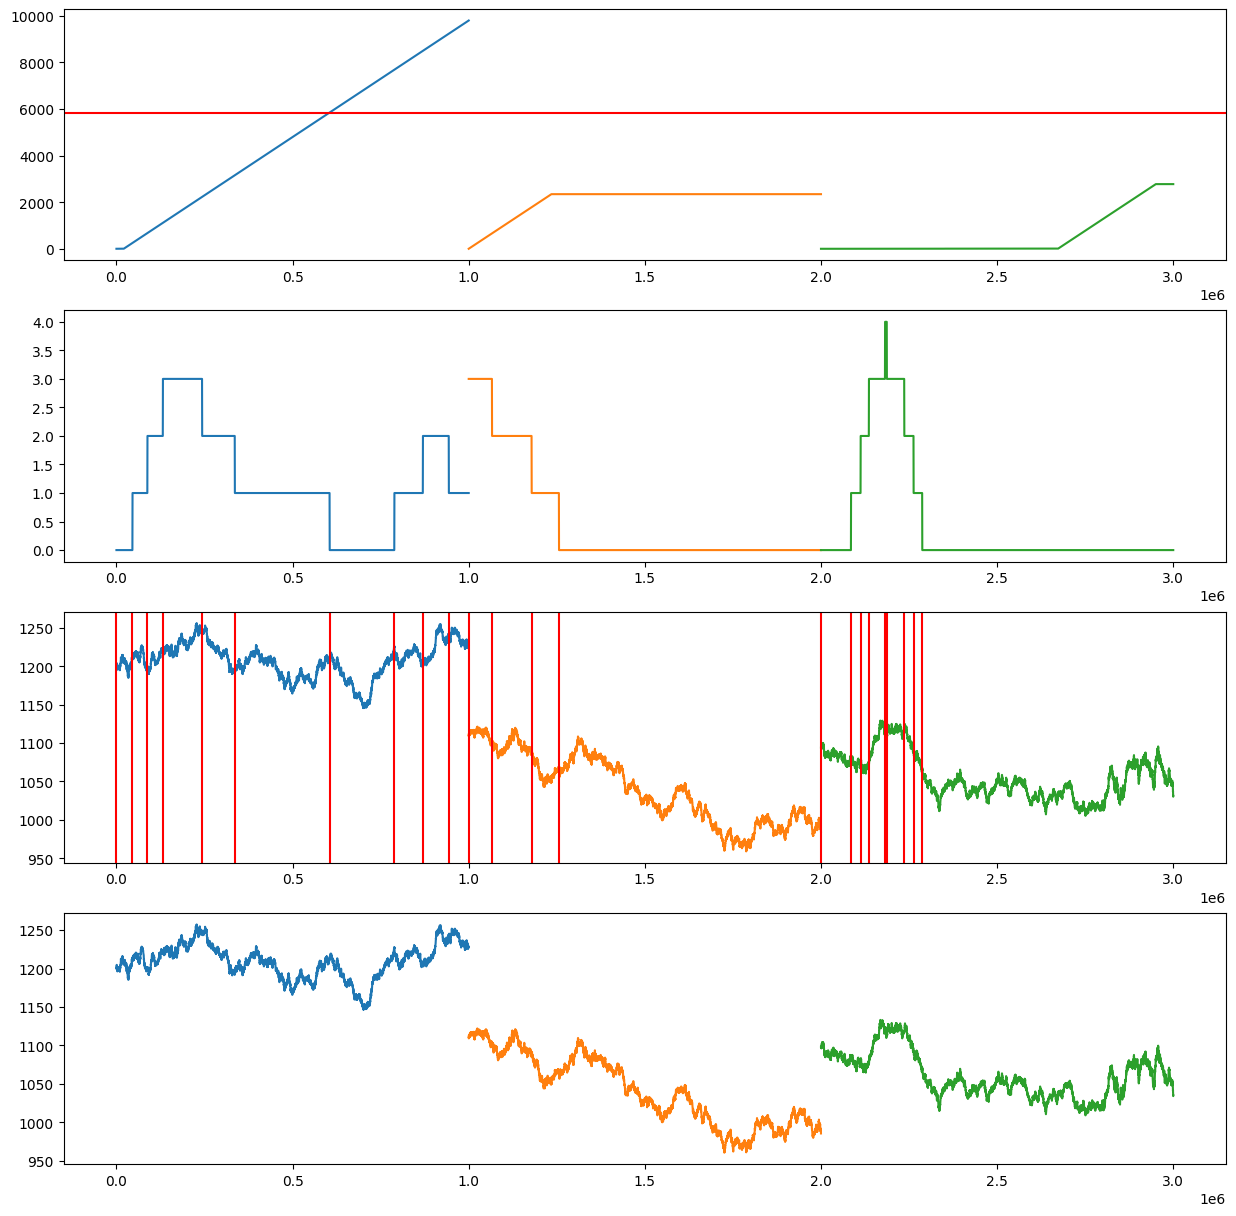

In [1286]:
fig, axs = plt.subplots(4, figsize=(15, 15))

# plot the probability of production drop against the timestamp for the three days
axs[0].plot(data_day_n1['timestamp'], data_day_n1['cumulative_ticks_with_enough_sunlight'], label='day -1')
axs[0].plot(data_day_0['timestamp'], data_day_0['cumulative_ticks_with_enough_sunlight'], label='day 0')
axs[0].plot(data_day_1['timestamp'], data_day_1['cumulative_ticks_with_enough_sunlight'], label='day 1')
# put a red line at 5833
axs[0].axhline(y=5833, color='red')

# also plot the humidity effect on production
axs[1].plot(data_day_n1['timestamp'], data_day_n1['humidity_effect_on_production'], label='day -1')
axs[1].plot(data_day_0['timestamp'], data_day_0['humidity_effect_on_production'], label='day 0')
axs[1].plot(data_day_1['timestamp'], data_day_1['humidity_effect_on_production'], label='day 1')


# now plot the true price of the orchids
axs[2].plot(data_day_n1['timestamp'], data_day_n1['true_price'], label='true price')
changes_in_values = np.where(data_day_n1['humidity_effect_on_production'].diff() != 0)
for change in changes_in_values[0]:
    axs[2].axvline(x=change*100, color='red')
    

axs[2].plot(data_day_0['timestamp'], data_day_0['true_price'], label='price')
changes_in_values = np.where(data_day_0['humidity_effect_on_production'].diff() != 0)
for change in changes_in_values[0]:
    axs[2].axvline(x=change*100 + data_day_n1['timestamp'].iloc[-1] , color='red')



axs[2].plot(data_day_1['timestamp'], data_day_1['true_price'], label='price')
changes_in_values = np.where(data_day_1['humidity_effect_on_production'].diff() != 0)
for change in changes_in_values[0]:
    axs[2].axvline(x=change*100 + data_day_0['timestamp'].iloc[-1] , color='red')



# and finally the ORCHIDS
axs[3].plot(data_day_n1['timestamp'], data_day_n1['ORCHIDS'], label='ORCHIDS')
axs[3].plot(data_day_0['timestamp'], data_day_0['ORCHIDS'], label='ORCHIDS')
axs[3].plot(data_day_1['timestamp'], data_day_1['ORCHIDS'], label='ORCHIDS')

data_day_n1[data_day_n1['humidity_effect_on_production'] != 0]['timestamp'].iloc[0]


In [1287]:
# calculate the ration between the spare ticks and the ticks_till_production_not_affected



In [1288]:

data.drop(columns=['enough_sunlight', 'enough_sunlight_count', 'rolling_sunlight_count', 'cumulative_ticks_with_enough_sunlight', 'ticks_till_production_not_affected', 'remaining_ticks', 'mean_sunlight_effect_of_last_10mins', 'DAY', 'timestamp', 'HUMIDITY'], inplace=True)

data.drop(columns=['bid_price_1', 'bid_price_2', 'bid_price_3', 'ask_price_1', 'ask_price_2', 'ask_price_3'], inplace=True)
data.drop(columns=['bid_volume_1', 'bid_volume_2', 'bid_volume_3','ask_volume_1', 'ask_volume_2', 'ask_volume_3'],  inplace=True)

data.drop(columns=['product', 'day'], inplace=True)

data.drop(columns=['profit_and_loss', 'SUNLIGHT'], inplace=True)


# drop nan
data.dropna(inplace=True)

data

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,humidity_effect_on_production,spare_ticks,probability_of_production_drop,average_sunlight,ratio,mid_price
199,1208.75,1.4,9.5,-2.2,0.0,3969,0.999829,2480.536407,0.199447,1091.0
200,1207.25,1.4,9.5,-2.2,0.0,3968,0.999829,2480.520367,0.198400,1091.0
201,1208.25,1.4,9.5,-2.2,0.0,3967,0.999829,2480.509682,0.197363,1092.0
202,1208.75,1.4,9.5,-2.2,0.0,3966,0.999829,2480.504344,0.196337,1095.5
203,1209.25,1.4,9.5,-2.2,0.0,3965,0.999829,2480.504343,0.195320,1092.0
...,...,...,...,...,...,...,...,...,...,...
995,1208.75,1.3,9.5,-2.8,2.0,3962,0.864564,3375.095925,0.039819,1070.5
996,1208.75,1.3,9.5,-2.8,2.0,3962,0.864392,3376.368451,0.039779,1071.5
997,1208.75,1.3,9.5,-2.8,2.0,3962,0.864221,3377.638850,0.039739,1072.0
998,1208.75,1.3,9.5,-2.8,2.0,3962,0.864049,3378.907111,0.039699,1071.5


In [1289]:
data_X = data.loc[:,data.columns !=  'ORCHIDS' ]
data_Y = data['ORCHIDS']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.2)

print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())

#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)





Training Set
     TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
622             1.5            8.5           -2.2   
468             1.6            8.5           -2.2   
855             1.4            9.5           -3.0   
873             1.4            9.5           -3.0   
214             1.5            9.5           -2.2   

     humidity_effect_on_production  spare_ticks  \
622                            1.0         3962   
468                            1.0         3962   
855                            1.0         3962   
873                            1.0         3962   
214                            0.0         3962   

     probability_of_production_drop  average_sunlight     ratio  mid_price  
622                        0.928510       2834.014673  0.063698     1083.5  
468                        0.954912       2639.113900  0.084658     1085.0  
855                        0.888565       3180.335833  0.046339     1082.5  
873                        0.885479       3206.8006

LinearRegression()

In [1290]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))

error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

print(regressor.coef_)
print(regressor.intercept_)


Prediction Score :  0.775362301801309
Mean Squared Error :  19.831476347836052
[-2.65489334e+01  1.52090512e+01  8.90640994e-01 -2.45033008e+00
 -2.14702399e+00 -7.21770285e+03 -8.38606632e-01  1.57713668e+03
 -6.61177799e-01]
19327.58269313169


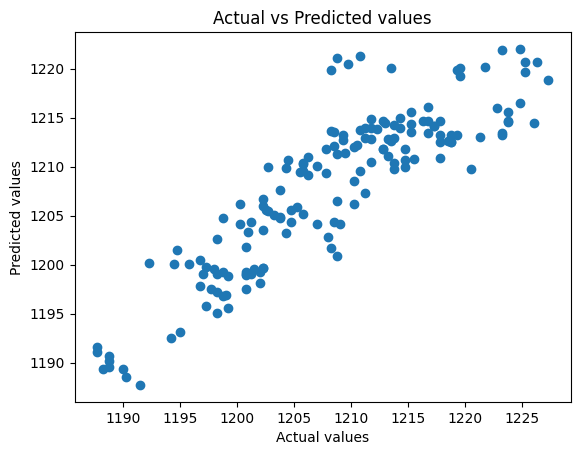

In [1291]:


# plot the predicted values against the actual values

plt.plot(test_y, predict_y, 'o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()




Prediction Score :  0.783426929134073
Mean Squared Error :  18.41192266129931
[-5.20903287e+01  1.47429585e+01  1.34946104e+01 -2.04775357e+00
 -1.78995174e+03 -2.69763000e-01 -7.56969217e-01]
4453.441327428818


TRANSPORT_FEES	EXPORT_TARIFF	IMPORT_TARIFF	humidity_effect_on_production	probability_of_production_drop	average_sunlight	mid_price